In [1]:
import os
import sys
import torch
path = '../'
sys.path.insert(1, '{0}/pkg/'.format(path))

import simulation_utils
import matplotlib.pyplot as plt
import warnings
import tqdm
import pickle
import pickle5 as pickle
import SpikeSuMC_network as SpikeSuMC_network
from run_simulation import run_simulation
import numpy as np
warnings.filterwarnings("ignore")
outputfile = open('logs/logs_single_run.txt', "w")
outputfile.close()


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.manual_seed(0) # for reproducibility

deter_start = None # determine time without switch at the beginning
number_rooms = 16
n_moves = 2 # number possible directions action K = 2 * n_moves (K number of transition)
n_maze = 4 # number of different mazes
volatility = 0.0005 
epochs = 10
batch_size = 1 # number of simulations. 

params_path = 'params/params_network.pkl'.format(n_moves, volatility)
seeds = []
# IF no file params use set_params in folder params ! 
with open('params/params_network_n_moves_{0}_H_{1}.pkl'.format(n_moves,volatility), 'rb')  as f:
        params= pickle.load(f)

simulations = []
with torch.no_grad():
    # Initilisation all simulation in batch dimension (all sim are run in parallel)
    for i in range(batch_size):
        print('Simulation {0}'.format(i+1))
        seed = round(2**32 * torch.rand(1).item() - 1)
        seeds += [seed]
        print(seed)
        simulations += [simulation_utils.create_simulation(epochs = epochs, number_rooms = number_rooms, volatility = volatility
         , n_moves = n_moves, n_maze = n_maze, seed  = seed, Dirichlet = 0,deter_start = deter_start,symmetric = True)]
        print('change points:')
        for key, value in sorted(simulations[i]['change_points'].items()):
            print((key,value), end =" ")
        print()
    
    # Running simulation
    
    params['batch_size'] = batch_size
    net = SpikeSuMC_network.SpikeSuMC(params,None)
  


Simulation 1
2131405823
change points:
(0, 0) 
---Network parameters---
batch_size: 1
------------------------
n_memory: 5
------------------------
plot: True
------------------------
print: True
------------------------
selector_module :
   a1: 0.07
   a2: 0.05
   a3: 4
   a4: 20
   alpha_p: 1e-06
   beta: 0.055
   eta: 0.0006
   input_shape: 512
   l: 4
   lr_msp: 0.0008
   msp_neurons: 20
   plot: True
   tau: 10
   Wmax: 0.13
------------------------
SpikeSuM_module :
   EI_neurons: 512
   eta1: 1e-06
   eta2: 0.002
   FB_inhib: 40
   input_neurons: 128
   l: 4
   modulation: full
   N: 10
   number_rooms: 16
   plot: True
   Poisson_rate: 0.2
   Poisson_rate_error: 0
   random_projection: False
   tau: 10
   theta: 0.5
   W: None
   W_init: 9
------------------------
T_pres: 100
------------------------


  0%|          | 0/10 [00:00<?, ?it/s]

Simulation N 1: Epoch 0 -> Moving to maze 0


 10%|█         | 1/10 [00:01<00:14,  1.59s/it]

----- Plot SpikeSuM Module:-----


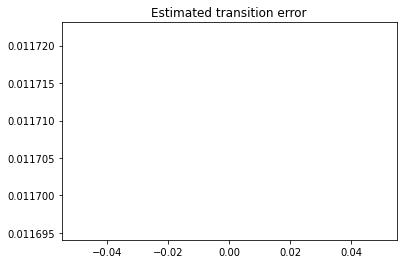

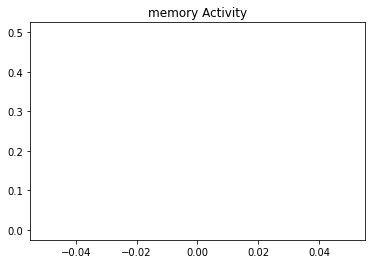

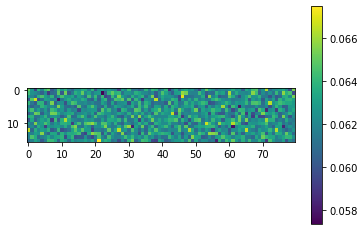

---------Selector Network---------
---First layer spikes----


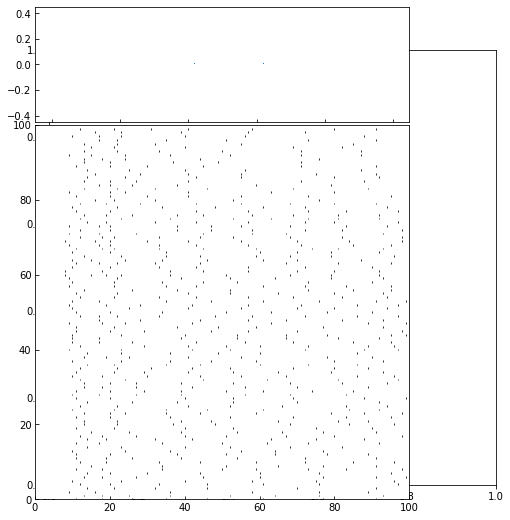

---Second layer spikes----


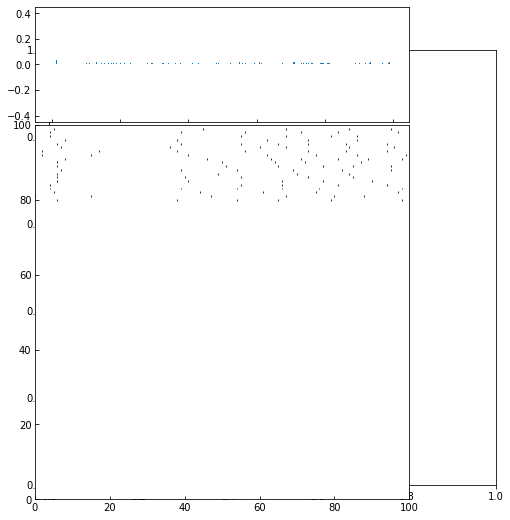

---Commitment matrix----


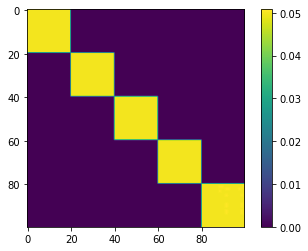

 20%|██        | 2/10 [00:07<00:23,  2.90s/it]

4 8 tensor([0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420,
        0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420,
        0.7420, 0.7420, 0.7560, 0.7560, 0.7560, 0.7560, 0.7560, 0.7560, 0.7560,
        0.7560, 0.7560, 0.7560, 0.7560, 0.7560, 0.7560, 0.7560, 0.7560, 0.7560,
        0.7560, 0.7560, 0.7560, 0.7560, 0.7840, 0.7840, 0.7840, 0.7840, 0.7840,
        0.7840, 0.7840, 0.7840, 0.7840, 0.7840, 0.7840, 0.7840, 0.7840, 0.7840,
        0.7840, 0.7840, 0.7840, 0.7840, 0.7840, 0.7840, 0.7520, 0.7520, 0.7520,
        0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7520,
        0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7520, 0.7070,
        0.7078, 0.7085, 0.7076, 0.7093, 0.7071, 0.7060, 0.7068, 0.7068, 0.7069,
        0.7071, 0.7060, 0.7079, 0.7074, 0.7060, 0.7095, 0.7068, 0.7066, 0.7068,
        0.7072]) Threshold:  tensor(1.2282)
Simulation N 1  Epoch 2 : Change-point detected. Activating memory :  4


 30%|███       | 3/10 [00:09<00:17,  2.47s/it]

8 7 tensor([0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900,
        0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900, 0.6900,
        0.6900, 0.6900, 0.6740, 0.6740, 0.6740, 0.6740, 0.6740, 0.6740, 0.6740,
        0.6740, 0.6740, 0.6740, 0.6740, 0.6740, 0.6740, 0.6740, 0.6740, 0.6740,
        0.6740, 0.6740, 0.6740, 0.6740, 0.7860, 0.7860, 0.7860, 0.7860, 0.7860,
        0.7860, 0.7860, 0.7860, 0.7860, 0.7860, 0.7860, 0.7860, 0.7860, 0.7860,
        0.7860, 0.7860, 0.7860, 0.7860, 0.7860, 0.7860, 0.7640, 0.7640, 0.7640,
        0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.7640,
        0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.7640, 0.6301,
        0.6307, 0.6298, 0.6305, 0.6312, 0.6290, 0.6280, 0.6288, 0.6290, 0.6285,
        0.6295, 0.6280, 0.6298, 0.6300, 0.6280, 0.6316, 0.6290, 0.6290, 0.6286,
        0.6320]) Threshold:  tensor(1.2157)


 40%|████      | 4/10 [00:10<00:12,  2.16s/it]

7 3 tensor([1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860,
        1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860, 1.0860,
        1.0860, 1.0860, 1.0460, 1.0460, 1.0460, 1.0460, 1.0460, 1.0460, 1.0460,
        1.0460, 1.0460, 1.0460, 1.0460, 1.0460, 1.0460, 1.0460, 1.0460, 1.0460,
        1.0460, 1.0460, 1.0460, 1.0460, 1.0120, 1.0120, 1.0120, 1.0120, 1.0120,
        1.0120, 1.0120, 1.0120, 1.0120, 1.0120, 1.0120, 1.0120, 1.0120, 1.0120,
        1.0120, 1.0120, 1.0120, 1.0120, 1.0120, 1.0120, 1.0500, 1.0500, 1.0500,
        1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 1.0500,
        1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 1.0500, 0.8638,
        0.8650, 0.8639, 0.8646, 0.8660, 0.8634, 0.8639, 0.8625, 0.8639, 0.8620,
        0.8634, 0.8620, 0.8638, 0.8639, 0.8639, 0.8690, 0.8634, 0.8634, 0.8630,
        0.8672]) Threshold:  tensor(1.2935)


 50%|█████     | 5/10 [00:11<00:09,  1.95s/it]

3 7 tensor([0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980,
        0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980, 0.8980,
        0.8980, 0.8980, 0.8620, 0.8620, 0.8620, 0.8620, 0.8620, 0.8620, 0.8620,
        0.8620, 0.8620, 0.8620, 0.8620, 0.8620, 0.8620, 0.8620, 0.8620, 0.8620,
        0.8620, 0.8620, 0.8620, 0.8620, 0.8920, 0.8920, 0.8920, 0.8920, 0.8920,
        0.8920, 0.8920, 0.8920, 0.8920, 0.8920, 0.8920, 0.8920, 0.8920, 0.8920,
        0.8920, 0.8920, 0.8920, 0.8920, 0.8920, 0.8920, 0.8680, 0.8680, 0.8680,
        0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.8680,
        0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.8680, 0.7629,
        0.7679, 0.7634, 0.7634, 0.7655, 0.7630, 0.7641, 0.7620, 0.7660, 0.7620,
        0.7633, 0.7623, 0.7626, 0.7633, 0.7637, 0.7678, 0.7639, 0.7630, 0.7643,
        0.7678]) Threshold:  tensor(1.2483)


 60%|██████    | 6/10 [00:13<00:07,  1.79s/it]

7 8 tensor([0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700,
        0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700, 0.9700,
        0.9700, 0.9700, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 0.9680, 0.9680, 0.9680, 0.9680, 0.9680,
        0.9680, 0.9680, 0.9680, 0.9680, 0.9680, 0.9680, 0.9680, 0.9680, 0.9680,
        0.9680, 0.9680, 0.9680, 0.9680, 0.9680, 0.9680, 0.8880, 0.8880, 0.8880,
        0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.8880,
        0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.8880, 0.7025,
        0.7072, 0.7045, 0.7036, 0.7048, 0.7038, 0.7032, 0.7020, 0.7068, 0.7020,
        0.7043, 0.7036, 0.7020, 0.7032, 0.7034, 0.7075, 0.7037, 0.7032, 0.7044,
        0.7065]) Threshold:  tensor(1.2709)


 70%|███████   | 7/10 [00:14<00:05,  1.70s/it]

8 4 tensor([0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260,
        0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260, 0.8260,
        0.8260, 0.8260, 0.9560, 0.9560, 0.9560, 0.9560, 0.9560, 0.9560, 0.9560,
        0.9560, 0.9560, 0.9560, 0.9560, 0.9560, 0.9560, 0.9560, 0.9560, 0.9560,
        0.9560, 0.9560, 0.9560, 0.9560, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9440, 0.9440, 0.9440,
        0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.9440,
        0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.9440, 0.7964,
        0.8016, 0.7979, 0.7981, 0.7987, 0.7995, 0.7973, 0.7960, 0.7997, 0.7960,
        0.7987, 0.7975, 0.7960, 0.7973, 0.7994, 0.8014, 0.7973, 0.7969, 0.7987,
        0.8019]) Threshold:  tensor(1.2570)


 80%|████████  | 8/10 [00:16<00:03,  1.68s/it]

4 5 tensor([0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540,
        0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540, 0.9540,
        0.9540, 0.9540, 0.9280, 0.9280, 0.9280, 0.9280, 0.9280, 0.9280, 0.9280,
        0.9280, 0.9280, 0.9280, 0.9280, 0.9280, 0.9280, 0.9280, 0.9280, 0.9280,
        0.9280, 0.9280, 0.9280, 0.9280, 0.9040, 0.9040, 0.9040, 0.9040, 0.9040,
        0.9040, 0.9040, 0.9040, 0.9040, 0.9040, 0.9040, 0.9040, 0.9040, 0.9040,
        0.9040, 0.9040, 0.9040, 0.9040, 0.9040, 0.9040, 0.9300, 0.9300, 0.9300,
        0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.9300,
        0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.9300, 0.8240,
        0.8290, 0.8248, 0.8252, 0.8263, 0.8276, 0.8264, 0.8246, 0.8278, 0.8246,
        0.8283, 0.8278, 0.8240, 0.8250, 0.8298, 0.8308, 0.8275, 0.8261, 0.8265,
        0.8293]) Threshold:  tensor(1.2870)


 90%|█████████ | 9/10 [00:18<00:01,  1.64s/it]

5 1 tensor([0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180,
        0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180, 0.7180,
        0.7180, 0.7180, 0.7700, 0.7700, 0.7700, 0.7700, 0.7700, 0.7700, 0.7700,
        0.7700, 0.7700, 0.7700, 0.7700, 0.7700, 0.7700, 0.7700, 0.7700, 0.7700,
        0.7700, 0.7700, 0.7700, 0.7700, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420,
        0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420,
        0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.7420, 0.6520, 0.6520, 0.6520,
        0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6520,
        0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6520, 0.6605,
        0.6637, 0.6605, 0.6613, 0.6612, 0.6636, 0.6612, 0.6614, 0.6632, 0.6606,
        0.6635, 0.6629, 0.6600, 0.6630, 0.6640, 0.6677, 0.6638, 0.6644, 0.6633,
        0.6652]) Threshold:  tensor(1.2271)
----- Plot SpikeSuM Module:-----


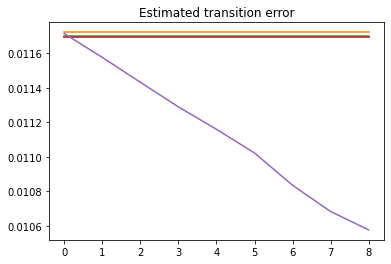

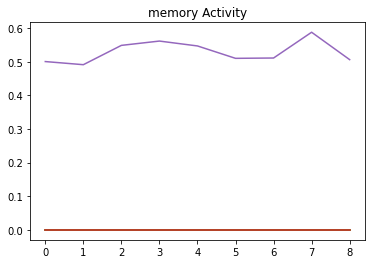

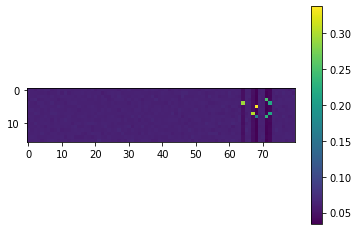

---------Selector Network---------
---First layer spikes----


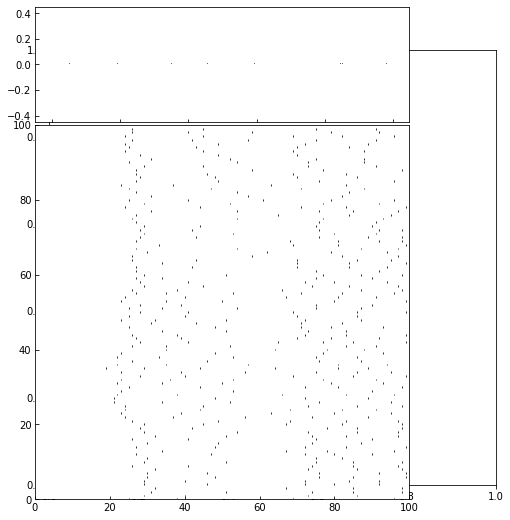

---Second layer spikes----


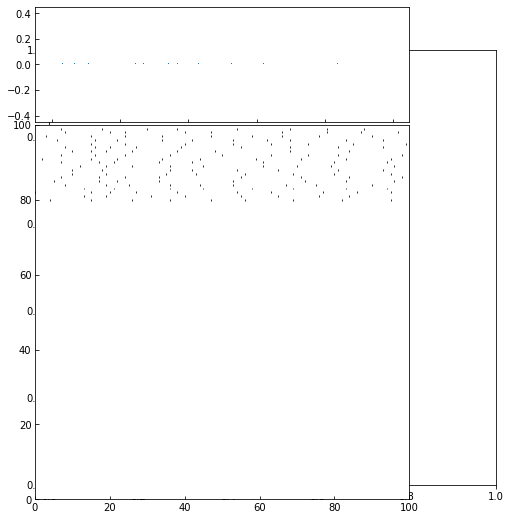

---Commitment matrix----


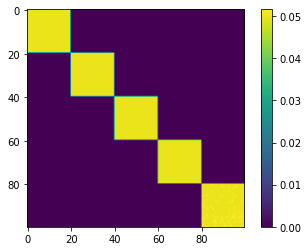

100%|██████████| 10/10 [00:24<00:00,  2.43s/it]

1 2 tensor([0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040,
        0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040, 0.8040,
        0.8040, 0.8040, 0.7080, 0.7080, 0.7080, 0.7080, 0.7080, 0.7080, 0.7080,
        0.7080, 0.7080, 0.7080, 0.7080, 0.7080, 0.7080, 0.7080, 0.7080, 0.7080,
        0.7080, 0.7080, 0.7080, 0.7080, 0.7380, 0.7380, 0.7380, 0.7380, 0.7380,
        0.7380, 0.7380, 0.7380, 0.7380, 0.7380, 0.7380, 0.7380, 0.7380, 0.7380,
        0.7380, 0.7380, 0.7380, 0.7380, 0.7380, 0.7380, 0.7920, 0.7920, 0.7920,
        0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.7920,
        0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.7920, 0.6073,
        0.6106, 0.6064, 0.6088, 0.6083, 0.6116, 0.6068, 0.6083, 0.6093, 0.6077,
        0.6085, 0.6103, 0.6082, 0.6081, 0.6105, 0.6124, 0.6092, 0.6104, 0.6086,
        0.6109]) Threshold:  tensor(1.2119)


number of succes: 100.0


In [3]:
save = 'HD'
net.SpikeSuM_module.tosave = save
criteria,epoch = run_simulation(simulations,net)

# Save and print results
torch.save(criteria,'../results/criteria_move_{2}_H_{0}_batch_{1}'.format(volatility,batch_size,n_moves))
print('number of succes:', round(100 * torch.mean(torch.Tensor([1-criteria[i]['stop'] for i in range(batch_size)])).item() ,2))

In [4]:
import save_utils
save_utils.save_weight_updates(net.SpikeSuM_module.info,  params['n_memory'],save)

RuntimeError: max(): Expected reduction dim to be specified for input.numel() == 0. Specify the reduction dim with the 'dim' argument.